# Understanding DCT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from scipy.misc import bytescale
import matplotlib.image as mpimg

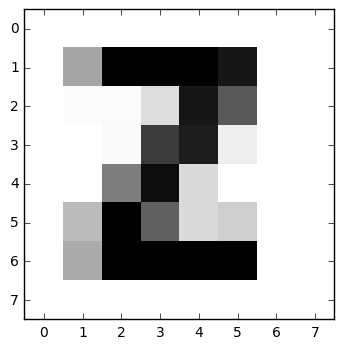

In [2]:
# loading a simple Z character image (8x8)
img = bytescale(mpimg.imread('i/z_char_8x8.png'))
img_h = 8
gray_img = img[:,:,0]

plt.imshow(img, cmap='gray',interpolation='nearest')

# All pixel's value

In [3]:
np.set_printoptions(precision=1,linewidth=140, suppress=True)
gray_img

array([[255, 255, 255, 255, 255, 255, 255, 255],
       [255, 165,   0,   0,   0,  22, 255, 255],
       [255, 252, 251, 221,  22,  88, 255, 255],
       [255, 255, 250,  59,  28, 238, 255, 255],
       [255, 255, 125,  13, 218, 255, 255, 255],
       [255, 187,   0,  96, 218, 206, 255, 255],
       [255, 171,   0,   0,   0,   0, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255]], dtype=uint8)

# All coefficient's value

In [4]:
# transform: 2D DCT
z_dct = fftpack.dct(fftpack.dct(gray_img.T, norm='ortho').T, norm='ortho')

np.set_printoptions(precision=1,linewidth=140, suppress=True)
z_dct

array([[ 1533.1,   -57.3,   450.2,    49.7,   -39.4,    21.9,   -77.6,    14. ],
       [   13.6,    47.2,     7.7,   -85.3,   -37.5,    49.5,    25.4,   -14.8],
       [   59.4,    14.5,   -98.6,   -45. ,    94.5,    42.7,   -46.3,    -2.4],
       [  -19. ,   -95.4,   -21.9,   172. ,    71.9,   -98.6,   -44.8,    27.3],
       [  293.4,    22.1,  -200.3,    25.4,   -98.1,   -81.2,   122.9,    11.7],
       [   -3.7,    45.9,    23.6,   -88.7,   -43.5,    59.6,    30.2,   -22.1],
       [  251. ,    30.1,  -223.6,   -30.1,    25.9,     6.6,    28.1,   -41.6],
       [   23.3,    38.6,   -12.8,   -51.8,     5.7,     2.1,   -22.9,    20.7]])

# DCT basis

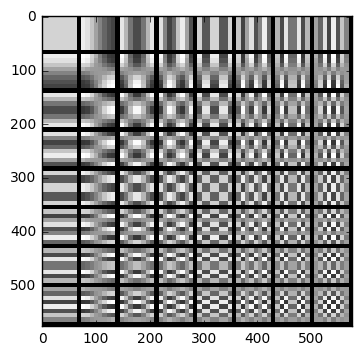

In [5]:
dct_basis = bytescale(mpimg.imread('i/dct_basis.png'))
plt.imshow(dct_basis, cmap='gray',interpolation='nearest')

# Reconstructed images

In [6]:
partial_z_idct = []

for ii in range(img_h*img_h):
    dct_copy = np.copy(z_dct)
    frequency_counter = 0 
    
    for u in range(img_h):
        for v in range(img_h):
            if frequency_counter > ii:
                dct_copy[u,v] = 0
            frequency_counter += 1

    partial_img_idct = fftpack.idct(fftpack.idct(dct_copy.T, norm='ortho').T, norm='ortho')
    partial_z_idct.append(partial_img_idct)

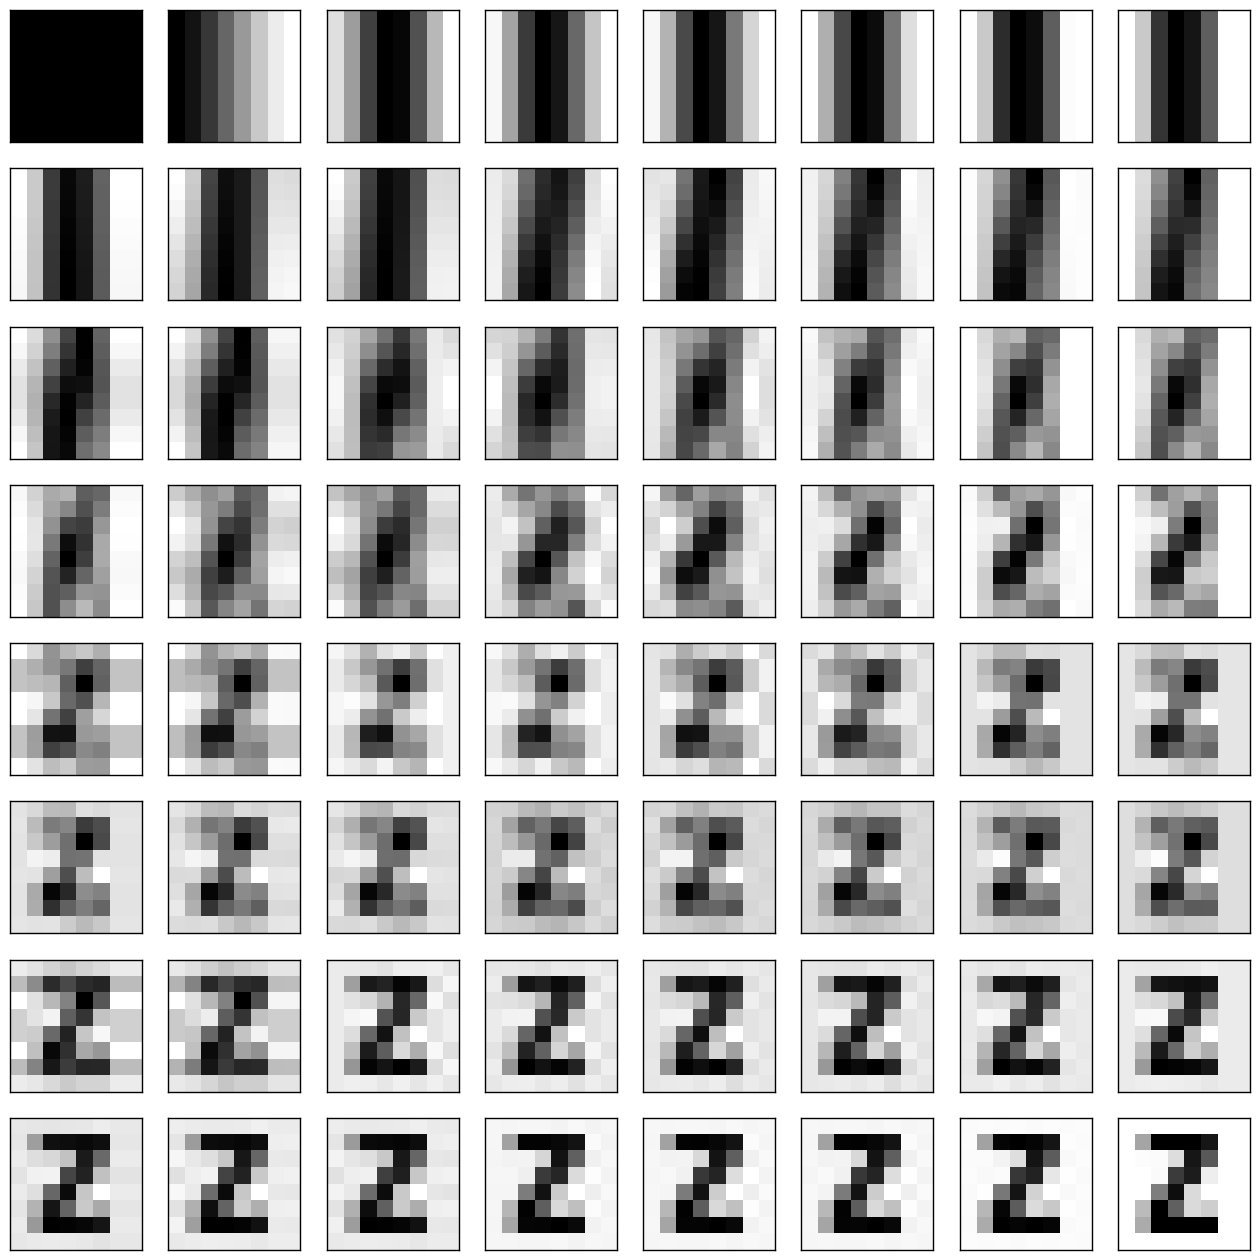

In [7]:
# shows each coefficient evolution towards the image formation
# here you can see how each DCT basis constributes to the image formation
# try to visualize them as a summation of the basis throughout the 64 elements 
fig = plt.figure(figsize=(16, 16))
for ii in range(img_h*img_h):
    plt.subplot(8, 8, ii + 1)
    plt.imshow(partial_z_idct[ii], cmap='gray',interpolation='nearest')
    plt.grid(False);
    plt.xticks([]);
    plt.yticks([]);